# Outlier Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats

In [2]:
indi_data=pd.read_csv("dataset/CleanedIndividualCases.csv")
loc_data=pd.read_csv("dataset/CleanedLocations.csv")

In [3]:
loc_data.columns=loc_data.columns.str.replace('-','')

In [4]:
indi_data.head()

,Unnamed: 0,age,sex,province,country,latitude,longitude,date_confirmation,outcome
0,0,8.0,male,Gujarat,India,23.02776,72.60027,15.04.2020,hospitalized
1,1,21.0,male,Moyobamba,Peru,-6.03271,-76.97230,09.05.2020,nonhospitalized
2,2,94.0,female,Lima,Peru,-12.04318,-77.02824,15.04.2020,nonhospitalized
3,3,8.0,male,Gujarat,India,23.02776,72.60027,22.05.2020,hospitalized
4,4,2.0,female,Coronel Portillo,Peru,-8.40921,-74.55572,30.04.2020,nonhospitalized


In [5]:
loc_data.head()

,Unnamed: 0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,CaseFatality_Ratio
0,0,Lakshadweep,India,2020-09-20 04:22:56,13.699997,72.183333,0,0,0,0.0,"Lakshadweep, India",0.0,0.0
1,1,Colorado,US,2020-09-20 04:22:56,38.432609,-102.739215,0,0,0,0.0,"Kiowa, Colorado, US",0.0,0.0
2,2,Montana,US,2020-09-20 04:22:56,45.519797,-104.539554,0,0,0,0.0,"Carter, Montana, US",0.0,0.0
3,3,Montana,US,2020-09-20 04:22:56,47.118246,-108.250888,0,0,0,0.0,"Petroleum, Montana, US",0.0,0.0
4,4,Nebraska,US,2020-09-20 04:22:56,41.913117,-99.976778,0,0,0,0.0,"Blaine, Nebraska, US",0.0,0.0


## Detecting Outliers in Individual Dataset

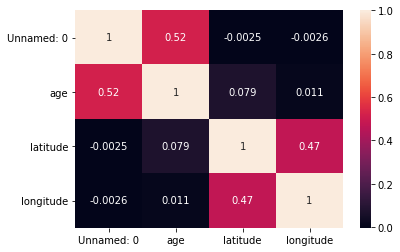

In [7]:
indi_data_correlation=indi_data.corr()
svm = sns.heatmap(indi_data_correlation, annot = True)
figure = svm.get_figure()
figure.savefig('OutlierVisuals/OuliersDataHeatMap.png', dpi=500)

### The correlation coefficient between age and latitude is 0.079 and between age and longitude is 0.011. This indicates that location has a weak relation with age in the given dataset.

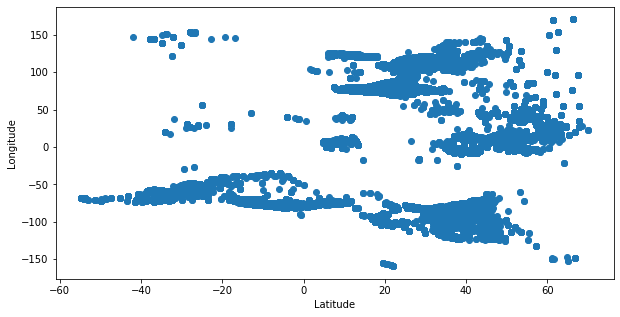

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(indi_data['latitude'], indi_data['longitude'])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()
plt.savefig('OutlierVisuals/AgeLatitude.png')

### Latitude and Longitude do not have significant outliers

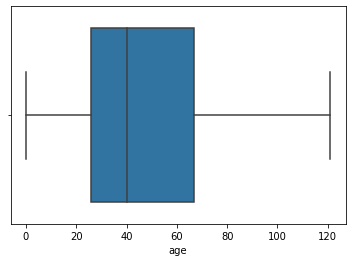

In [10]:
latLong = sns.boxplot(x=indi_data['age'])
figure = latLong.get_figure()
figure.savefig('OutlierVisuals/latLong.png', dpi=500)

### Age attribute has an extreme outlier value of 121yrs and age group in the range of 101-106yrs are also considered as outliers for this attribute

In [11]:
indi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550347 entries, 0 to 550346
Data columns (total 9 columns):
Unnamed: 0           550347 non-null int64
age                  550347 non-null float64
sex                  550347 non-null object
province             550347 non-null object
country              550347 non-null object
latitude             550347 non-null float64
longitude            550347 non-null float64
date_confirmation    550347 non-null object
outcome              550347 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 37.8+ MB


## Detecting Outliers in Location Dataset

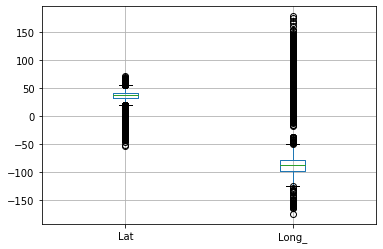

In [12]:
df=pd.DataFrame(data=loc_data, columns=['Lat', 'Long_'])
df = df.boxplot()
df.figure.savefig("OutlierVisuals/latLongBoxplot.png")

### There are not outliers in the latitude and longitude data columns

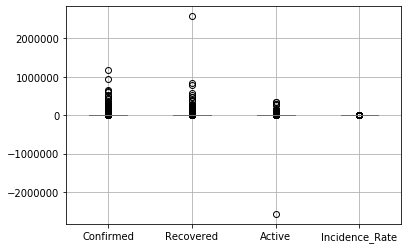

In [13]:
df=pd.DataFrame(data=loc_data, columns=['Confirmed', 'Recovered','Active','Incidence_Rate'])
df = df.boxplot()
df.figure.savefig("OutlierVisuals/latLongBoxplot2.png")

### Confirmed, Active features and Recovered cases contain outliers whereas incidence_rate does not have extreme values(outliers).

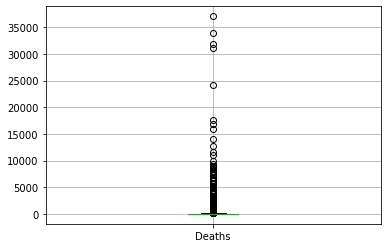

In [14]:
df=pd.DataFrame(data=loc_data, columns=['Deaths'])
df = df.boxplot()
df.figure.savefig("OutlierVisuals/deaths.png")

### Death attribute has a few adverse outliers

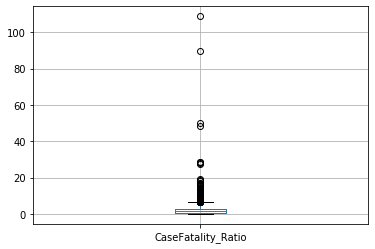

In [15]:
df=pd.DataFrame(data=loc_data, columns=['CaseFatality_Ratio'])
df = df.boxplot()
df.figure.savefig("OutlierVisuals/fatalityRatio.png")

### Boxplot for Case-Fatality_ratio shows that it has an outlier above the value of 100 which indicates that the no.of deaths are more than confirmed cases, which is not possible. 


## Dealing With Outliers: Finding Actual Values

In [16]:
sub_loc_data=loc_data.drop(['Province_State','Country_Region','Last_Update','Combined_Key'], axis=1)
#z = np.abs(stats.zscore(sub_loc_data['Confirmed'].dropna()))
#print(z)

In [17]:
sub_indi_data=indi_data.drop(['province','country','date_confirmation','outcome'], axis=1)

### Z-score for Calculation

In [18]:
outliers=[]
def z_outlier(data,threshold=0,negativeAllowed=0):
    global outliers
    outliers=[]
    m=np.mean(data)
    sd=np.std(data)
    threshold=(3*sd)+m
    
    for i in data:
        z_score=(i-m/sd)
        if not negativeAllowed:
            if np.abs(z_score)>threshold:
                outliers.append(i)
        else:
            if i<0:
                outliers.append(i)
    return outliers,threshold
    
    


### For 'Age' Feature

In [19]:
outliers_age=None
threshold_age=0
outliers_age,threshold_age=z_outlier(sub_indi_data['age'])
print(outliers_age,"\n",threshold_age)

[120.0, 121.0] 
 106.3557558683375


### Here the 'age' column has two outlier namely 120 and 121 years. Even though the data is isolated from the rest of the data, we cannot entirely dismiss the possibility of this occurence. There might be people in this age range and thus the values cannot be filtered out as unrealistic

### For 'Latitude' Feature (Individual Dataset)

In [20]:
outliers_latitude=None
threshold_latitude=0
outliers_latitude,threshold_latitude=z_outlier(sub_indi_data['latitude'])
print(outliers_latitude,"\n",threshold_latitude)

[] 
 79.63105107309502


### For 'Longitude' Feature (Individual Dataset) 

In [21]:
outliers_longitude=None
threshold_longitude=0
outliers_longitude,threshold_longitude=z_outlier(sub_indi_data['latitude'])
print(outliers_longitude,"\n",threshold_longitude)

[] 
 79.63105107309502


### We can conclude that the Individual Data does not have anyNumeric Outliers that need to be subjected to Filtering

### For 'Confirmed' Feature

In [22]:
outliers_confirmed=None
threshold_confirmed=0
outliers_confirmed,threshold_confirmed=z_outlier(sub_loc_data['Confirmed'])
print(outliers_confirmed,"\n",threshold_confirmed)

[622934, 347372, 444978, 240687, 419043, 315597, 283460, 659656, 131573, 294210, 233600, 183096, 182856, 167333, 268009, 220205, 163479, 141042, 174140, 251261, 205250, 931673, 282535, 250490, 609558, 152858, 165218, 238828, 502982, 1167496, 171341, 530908, 169169, 342788, 218772, 133626, 349167, 275633, 187045, 139245, 259817, 166516, 138576, 336622] 
 131449.2784269202


### We infer that the Confirmed Cases have outliers as shown above. We do not intend to remove or filter out these outliers from the dataset as they can possibly be correct values and this is subject to further sampling/research to confirm their accuracy.

### For 'Active' Feature

In [23]:
outliers_active=None 
threshold_active=0
outliers_active,threshold_active=z_outlier(sub_loc_data['Active'])
print(outliers_active,"\n",threshold_active)

[-2577446.0, 337913.0, 301273.0, 335158.0, 137310.0, 136000.0, 253487.0, 163461.0, 133419.0, 299546.0] 
 133281.38178498187


### As we can see, the outliers in 'Active' Column contain some negative values and some values that are higher than any value in the confirmed cases column. Both of these scenarios are not possible, thus it is imperative to clean the dataset and get rid of these outliers

### For 'Recoverd' Feature

In [24]:
outliers_recovered=None 
threshold_recovered=0
outliers_recovered,threshold_recovered=z_outlier(sub_loc_data['Recovered'])
print(outliers_recovered,"\n",threshold_recovered)

[2577446, 478077, 254386, 174350, 357632, 249539, 209885, 589434, 280351, 206727, 170627, 172741, 233463, 204728, 228258, 194520, 780448, 269784, 205741, 519891, 201671, 394026, 834432, 475717, 270094, 190021, 236055] 
 161417.79202121022


### We notice that among all the outliers in the recoverd column, the value 2577446 is very extreme and not possible as it is greated than any value in the Confirmed Cases. The rest of the values are still considerable and thus we remove only one extreme recovered number.

### For 'Deaths' Feature

In [25]:
outliers_death=None 
threshold_death=0
outliers_death,threshold_death=z_outlier(sub_loc_data['Deaths'])
print(outliers_death,"\n",threshold_death)

[12799, 4913, 9944, 7586, 11084, 5750, 31085, 9448, 24118, 8491, 4930, 15940, 6221, 8801, 6656, 6451, 8004, 17634, 33927, 5797, 8998, 6408, 5244, 4907, 7808, 31791, 8685, 4869, 16917, 11545, 8936, 14009, 5044, 5797, 8999, 6330, 5157, 4939, 7315, 7243, 37076] 
 4671.168948032887


### Even though the Death column has a few outliers we do not filter these values out because they could very well represent certain areas which were adversely hit by the pandemic and witnesses high date rates

In [26]:
outliers_fatality=None 
threshold_fatality=0
outliers_fatality,threshold_fatality=z_outlier(sub_loc_data['CaseFatality_Ratio'])
print(outliers_fatality,"\n",threshold_fatality)

[28.874629812438307, 16.181239059944332, 18.19901626939084, 13.672876431379251, 15.808308697681653, 15.532271584241409, 18.49447271451132, 13.932683790965454, 17.054917848300697, 13.984647592463364, 14.285714285714285, 14.285714285714285, 19.17808219178082, 16.62531017369727, 27.272727272727273, 13.655172413793109, 16.71826625386997, 16.9811320754717, 14.285714285714285, 28.57142857142857, 16.666666666666668, 50.0, 89.47368421052632, 27.807486631016044, 108.81294964028775, 48.44167408726626] 
 12.911658358937249


### The Case-Fatality Ratio has a number of outliers but there are some that are completely unrealistic. As the ratio= deaths/confirmed*100, this value can never surpass 100. Thus, values above and also near 100, need to be removed from the column.

In [27]:
outliers_lat=None 
threshold_lat=0
outliers_lat,threshold_lat=z_outlier(sub_loc_data['Lat'])
print(outliers_lat,"\n",threshold_lat)

[] 
 74.22330557099205


## 3) Applying Outlier Removal Strategy to Original Location Dataset

### Removing Outliers From 'Active' Feature of Location Dataset

In [28]:
loc_data.where(loc_data.Active.isin(outliers_active)).dropna().index

Int64Index([35, 86, 343, 496, 604, 730, 831, 988, 1236, 3855], dtype='int64')

In [29]:
rev_loc_data=loc_data.query(f"Active not in {outliers_active}")

In [30]:
print(rev_loc_data)

      Unnamed: 0 Province_State Country_Region          Last_Update  \
0              0    Lakshadweep          India  2020-09-20 04:22:56   
1              1       Colorado             US  2020-09-20 04:22:56   
2              2        Montana             US  2020-09-20 04:22:56   
3              3        Montana             US  2020-09-20 04:22:56   
4              4       Nebraska             US  2020-09-20 04:22:56   
...          ...            ...            ...                  ...   
3896        3896      Tennessee             US  2020-09-20 04:22:56   
3897        3897      Tennessee             US  2020-09-20 04:22:56   
3898        3898        Vermont             US  2020-09-20 04:22:56   
3899        3899     Washington             US  2020-09-20 04:22:56   
3900        3900        Wyoming             US  2020-09-20 04:22:56   

            Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0     13.699997   72.183333          0       0          0     0.0   
1     38.

In [31]:
print("Number of rows in Orginal Dataset: ",loc_data.shape)
print("Number of rows containing outliers: ",len(outliers_active))
print("Number of rows in Revised Dataset: ",rev_loc_data.shape)

Number of rows in Orginal Dataset:  (3901, 13)
Number of rows containing outliers:  10
Number of rows in Revised Dataset:  (3891, 13)


## Removing Case-Fatality Ratio Outliers from Loaction Dataset

In [32]:
OutlierIndex = loc_data.where(loc_data.CaseFatality_Ratio.isin(outliers_fatality)).dropna().index

In [33]:
rev_loc_data=rev_loc_data.query(f"CaseFatality_Ratio not in {outliers_fatality}")
print(rev_loc_data)

      Unnamed: 0 Province_State Country_Region          Last_Update  \
0              0    Lakshadweep          India  2020-09-20 04:22:56   
1              1       Colorado             US  2020-09-20 04:22:56   
2              2        Montana             US  2020-09-20 04:22:56   
3              3        Montana             US  2020-09-20 04:22:56   
4              4       Nebraska             US  2020-09-20 04:22:56   
...          ...            ...            ...                  ...   
3896        3896      Tennessee             US  2020-09-20 04:22:56   
3897        3897      Tennessee             US  2020-09-20 04:22:56   
3898        3898        Vermont             US  2020-09-20 04:22:56   
3899        3899     Washington             US  2020-09-20 04:22:56   
3900        3900        Wyoming             US  2020-09-20 04:22:56   

            Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0     13.699997   72.183333          0       0          0     0.0   
1     38.

In [34]:
print("Number of rows in Orginal Dataset: ",loc_data.shape)
print("Number of rows containing outliers: ",len(outliers_fatality + outliers_active))
print("Number of rows in Revised Dataset: ",rev_loc_data.shape)

Number of rows in Orginal Dataset:  (3901, 13)
Number of rows containing outliers:  36
Number of rows in Revised Dataset:  (3865, 13)


### The final revised dataset has fewer rows as compared to original dataset, after removal of necessary outliers

In [35]:
rev_loc_data = rev_loc_data.drop(columns=['Unnamed: 0'])
rev_loc_data = rev_loc_data.reset_index()
rev_loc_data.to_csv("dataset/RevisedLocationData.csv")


In [36]:
OutlierIndexdf = pd.DataFrame(OutlierIndex)
OutlierIndexdf.to_csv('dataset/OutlierIndex.csv', index=False)